## Maple Syrup Production in the US: Exploratory Data Analysis
by: Juan Daniel Ochoa, August 8, 2023

## Context
Most of the worlds maple syrup is produced in Southeastern Canada and the northeastern United States with maple syrup being produced in small amounts in some other countires - such as Japan and South Korea. Until the 1930s, the United States produced most of the world's maple syrup with Vermont, Maine, and New York being the largest domestic producers. However, after a rapid growth in the industry in the 1990s, Canada now produces more than 80 percent of the worlds maple syrup as American producers struggle to keep up.

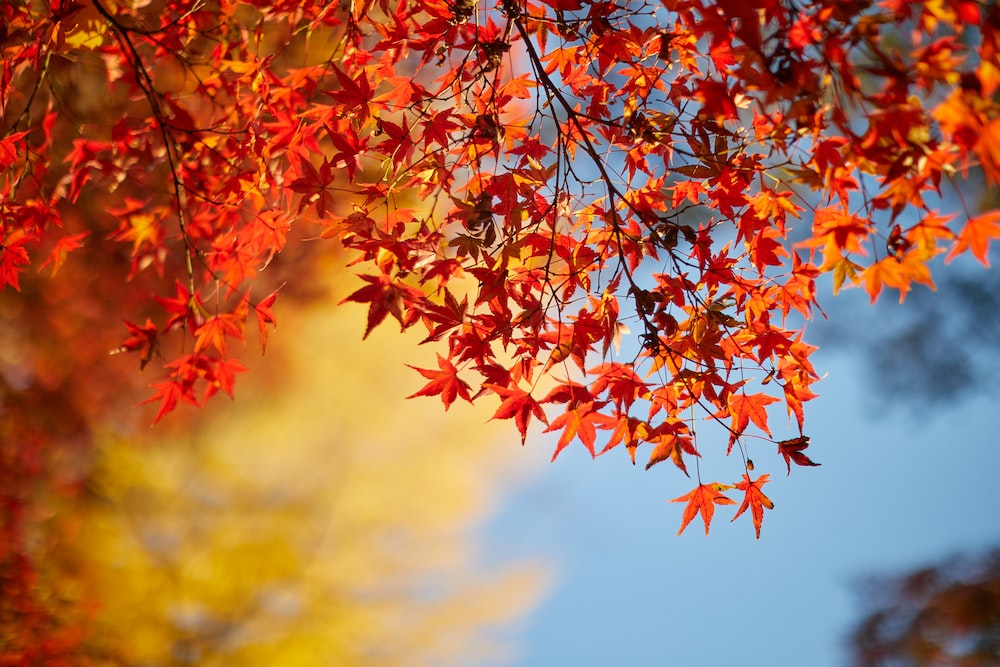

## Goal

### Exploring Factors Influencing Maple Syrup Production and Seasonal Trends

The goal of this project is to conduct a comprehensive analysis of domestic maple syrup production data, with a focus on understanding the factors that influence production levels and identifying seasonal trends. By examining the relationships between variables such as yield per tap, average price, and production, the project aims to provide valuable insights into the dynamics of the maple syrup industry. Additionally, the project seeks to uncover any recurring seasonal patterns in maple syrup production over the years. Through rigorous data exploration, visualization, and hypothesis testing, this project aims to contribute to the knowledge of key drivers impacting maple syrup production, enabling informed decision-making for producers, policymakers, and industry stakeholders.

This project's objectives include:

- Investigating the correlation between yield per tap and overall maple syrup production to determine the impact of tapping efficiency on production levels.
- Analyzing the relationship between average price per gallon and maple syrup production to understand the role of market dynamics in influencing production.
- Exploring potential seasonal patterns in maple syrup production across different years, shedding light on the seasonal variations and factors contributing to such trends.

By achieving these objectives, the project seeks to provide actionable insights that can inform strategic planning, resource allocation, and decision-making within the maple syrup industry.

#### Hypothesis 1: Higher Yield Leads to Increased Maple Syrup Production

Hypothesis: There exists a positive correlation between the yield per tap and the overall production of maple syrup. States with higher yields per tap are expected to exhibit higher levels of maple syrup production. The higher efficiency of syrup extraction from each tap could contribute to increased overall production.

Expected Outcome: If this hypothesis is valid, we anticipate observing a statistically significant positive trend between the yield per tap and the total production of maple syrup across different states and years.

#### Hypothesis 2: Impact of Average Price on Maple Syrup Production

Hypothesis: The average price per gallon of maple syrup has an influence on the quantity of maple syrup produced. An increase in the average price may incentivize producers to enhance their production efforts, resulting in higher overall maple syrup production.

Expected Outcome: If this hypothesis holds true, we expect to identify significant relationships between the average price of maple syrup and the levels of production in various states and years.


#### Hypothesis 3: Seasonal Patterns in Maple Syrup Production

Hypothesis: Maple syrup production displays distinct seasonal patterns or seasonality, potentially influenced by environmental factors, tapping season, or other variables. We anticipate observing recurring peaks and troughs in maple syrup production across different years.

Expected Outcome: If this hypothesis is substantiated, our analysis is likely to reveal recurring annual fluctuations in maple syrup production, offering insights into the factors driving the seasonal variations.

#### Hypothesis 4: Inverse Relationship Between Yield per Tap and Number of Taps

Hypothesis: There exists an inverse relationship between the yield per tap and the number of taps used for maple syrup extraction. As the number of taps increases, the yield per tap is expected to decrease. This hypothesis aims to uncover whether there is an optimal balance of taps per tree that maximizes yield, beyond which adding more taps leads to diminishing returns.

Expected Outcome: If this revised hypothesis holds true, the analysis may reveal a negative correlation between the yield per tap and the number of taps. The examination of this relationship can provide insights into the point at which additional tapping may result in decreased yield per tap and inform producers about the optimal tapping strategy for achieving optimal yield and efficiency.

## Data Overview

First let's load the dataset and see what it looks like

In [102]:
# Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import plotly.express as px
import plotly.io as pio

# Load the dataset from the provided csv file and
# Display basic information about the loaded DataFrame

maple_syrup_df = pd.read_csv('Domestic_Maple_Syrup_Production_2000-2021.csv')
print('DataFrame shape: ', maple_syrup_df.shape, '\n')
maple_syrup_df.info()

DataFrame shape:  (220, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            220 non-null    object 
 1   Num_of_Taps      220 non-null    int64  
 2   Yield_per_Tap    220 non-null    float64
 3   Production       220 non-null    object 
 4   Avg_Price        220 non-null    float64
 5   Value            220 non-null    object 
 6   Retail_Price     220 non-null    float64
 7   Wholesale_Price  220 non-null    object 
 8   Bulk_P_Price     220 non-null    object 
 9   Bulk_G_Price     220 non-null    object 
 10  Date_Open        130 non-null    object 
 11  Date_Closed      130 non-null    object 
 12  Year             220 non-null    int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 22.5+ KB


In [103]:
# Remove the limit of number of rows displayed 
pd.set_option('display.max_rows', None)
maple_syrup_df.head()

,State,Num_of_Taps,Yield_per_Tap,Production,Avg_Price,Value,Retail_Price,Wholesale_Price,Bulk_P_Price,Bulk_G_Price,Date_Open,Date_Closed,Year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.30,3.20,35.10,2/15/2021,4/30/2021,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.60,2.40,26.80,2/1/2021,4/14/2021,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.20,2.40,26.40,1/11/2021,4/16/2021,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.50,2.40,26.70,1/1/2021,5/4/2021,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.80,2.50,27.60,1/4/2021,4/15/2021,2021


It is apparent that are several empty cells, or rather non-numeric values in the dataset, distributed between the Wholesale_Price, Bulk_P_Price, Bulk_G_Price, Date_Open and Date_Closed columns, which need to be handled properly

## Data Cleaning and Transformation

The Production and Value columns are numeric values, but they have commas, which need to be removed so the column data types could be changed to integer

In [104]:
# Convert certain columns to numeric format
for col in ['Production', 'Value']:
    maple_syrup_df[col] = maple_syrup_df[col].str.replace(',', '').apply(pd.to_numeric)
    
maple_syrup_df.dtypes

State               object
Num_of_Taps          int64
Yield_per_Tap      float64
Production           int64
Avg_Price          float64
Value                int64
Retail_Price       float64
Wholesale_Price     object
Bulk_P_Price        object
Bulk_G_Price        object
Date_Open           object
Date_Closed         object
Year                 int64
dtype: object

Now the non-numeric values, let's create an imputer function that uses the mean value of the same column for the corresponding state to replace missing values in specific columns. This imputation is done to ensure that the dataset is more complete and suitable for analysis.

In [105]:
# Define a function to impute missing values in specific columns
def data_imputer(cols):
    
    # Iterate through the specified columns
    for col in cols:
        # Remove '(D)' and convert column values to numeric
        maple_syrup_df[col] = maple_syrup_df[col].str.replace('(D)', '').apply(pd.to_numeric)
        
        # Find unique states with missing values in the column
        missing_states = list(maple_syrup_df[maple_syrup_df[col].isnull()]['State'].unique())
        
        # Create a dictionary to store mean values for missing states
        missing_data_map = {
            state: maple_syrup_df[maple_syrup_df['State'] == state][col].mean()
            for state in missing_states
        }
        
        # Impute missing values with the mean values for respective states
        for state in missing_states:
            missing_state_indices = maple_syrup_df[
                (maple_syrup_df[col].isnull()) & (maple_syrup_df['State'] == state)
            ].index
            maple_syrup_df.loc[missing_state_indices, col] = round(missing_data_map[state], 2)
    
    # Return the DataFrame after imputation
    return maple_syrup_df

In [106]:
# Apply the data imputer function to specific columns
maple_syrup_data = data_imputer(['Wholesale_Price', 'Bulk_P_Price', 'Bulk_G_Price'])
maple_syrup_data.head()

,State,Num_of_Taps,Yield_per_Tap,Production,Avg_Price,Value,Retail_Price,Wholesale_Price,Bulk_P_Price,Bulk_G_Price,Date_Open,Date_Closed,Year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.3,3.2,35.1,2/15/2021,4/30/2021,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.6,2.4,26.8,2/1/2021,4/14/2021,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.2,2.4,26.4,1/11/2021,4/16/2021,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.5,2.4,26.7,1/1/2021,5/4/2021,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.8,2.5,27.6,1/4/2021,4/15/2021,2021


## Summary Statistics

In [107]:
# Display summary statistics of the DataFrame
print(maple_syrup_data.describe())

       Num_of_Taps  Yield_per_Tap   Production   Avg_Price         Value  \
count   220.000000     220.000000   220.000000  220.000000    220.000000   
mean    993.081818       0.224750   257.309091   40.539091   8827.763636   
std    1188.199694       0.061349   380.714295   11.734254  11698.718741   
min      51.000000       0.083000     6.000000   14.200000    290.000000   
25%     353.750000       0.173750    60.000000   32.275000   2195.250000   
50%     470.000000       0.223500   115.000000   38.450000   4795.000000   
75%    1415.500000       0.264500   265.000000   46.900000   8789.250000   
max    6500.000000       0.410000  2070.000000   87.200000  59700.000000   

       Retail_Price  Wholesale_Price  Bulk_P_Price  Bulk_G_Price         Year  
count    220.000000       220.000000    220.000000    220.000000   220.000000  
mean      42.351818        36.915091      2.203682     23.672500  2010.377273  
std        9.115782         8.307225      0.535388      7.271899     6.2004

Upon delving into the summary statistics of the dataset, a multitude of intriguing insights emerge that beckon us to explore the intricate dynamics of maple syrup production. Let's uncover the nuances behind these numbers. 

For starters we can see that the mean number of taps per operation stands at approximately 993, with a considerable standard deviation of 1188 taps. This variation prompts us to delve deeper into Hypothesis 4: the potential inverse relationship between the yield per tap and the number of taps used. **Could  this  signify  an  optimal  tapping  threshold  beyond  which  efficiency  diminishes?**

Moreover, the average yield per tap rests at 0.2247 gallons, accompanied by a modest standard deviation of 0.0613. This prompts us to address Hypothesis 1, which suggests that higher yields could lead to increased overall production. Is there a correlation between the yield per tap and the overall production of maple syrup? 

Additionally, the production volume exhibits a mean of 257.31 thousand gallons, yet boasts a substantial standard deviation of 380.71 thousand gallons. Hypothesis 2 begs exploration: How does the average price per gallon influence the quantity of maple syrup produced? This requires further investigation to find out why different states may have varying levels of production in response to price fluctuations. Notably, the average price per gallon of maple syrup hovers at $40.54, showcasing fluctuations across different operations and instigating deeper inquiry into Hypothesis 2. 

The dataset's overall value, ranging from 290 thousand USD to a remarkable $59.7 million, emphasizes the economic significance of maple syrup production. As we navigate through these statistics, we are compelled to address Hypothesis 3, which pertains to the seasonal patterns in maple syrup production. 
Do we discern recurring peaks and troughs that align with environmental factors or tapping seasons?

## Data Visualization

First let's look at the value distribution of our numerical columns

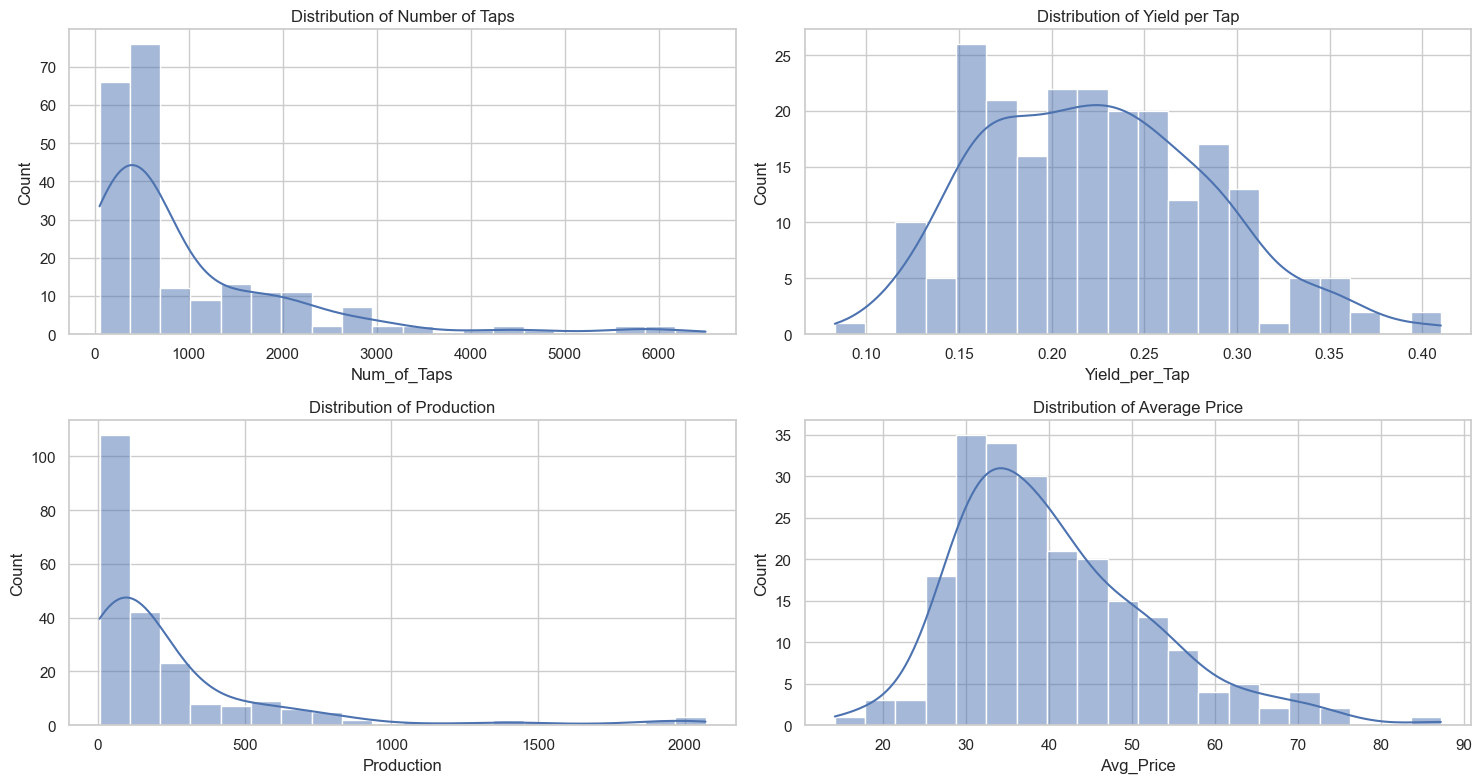

<Figure size 640x480 with 0 Axes>

In [108]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(15, 8))

# Create histograms for different numerical variables
plt.subplot(2, 2, 1)   # Create a subplot in a 2x2 grid, first position


# Generate a histogram plot using Seaborn for the 'Num_of_Taps' column
sns.histplot(
            data = maple_syrup_data, 
             x = 'Num_of_Taps', 
             bins = 20,
             kde = True,   # Set the number of bins to 20 and include a kernel density estimate (KDE)
             alpha = 0.5   # 'alpha' sets the transparency of the bars
)

plt.title("Distribution of Number of Taps")   # Set the title of the subplot

plt.subplot(2, 2, 2)  # Create a subplot in a 2x2 grid, second position

# Generate a histogram plot for the 'Yield_per_Tap' column
sns.histplot(
            maple_syrup_data['Yield_per_Tap'], 
            bins = 20, 
            kde = True
)

plt.title("Distribution of Yield per Tap")   # Set the title of the subplot

plt.subplot(2, 2, 3)   # Create a subplot in a 2x2 grid, third position

# Generate a histogram plot for the 'Production' column
sns.histplot(
            maple_syrup_data['Production'], 
            bins = 20, 
            kde = True
)

plt.title("Distribution of Production")   # Set the title of the subplot

plt.subplot(2, 2, 4)   # Create a subplot in a 2x2 grid, fourth position

# Generate a histogram plot for the 'Avg_Price' column
sns.histplot(
            maple_syrup_data['Avg_Price'], 
            bins = 20, 
            kde = True
)

plt.title("Distribution of Average Price")   # Set the title of the subplot

# Adjust layout for better spacing
plt.tight_layout()

plt.show()   # Display the entire figure containing subplots
plt.clf()    # Clear the current figure for potential further plotting

#### First Plot - Distribution of Number of Taps:

- The distribution is right-skewed, indicating that most states have a relatively low number of taps, but a few states have significantly more taps, meaning more production.
- Around 140 out of 220 states have fewer than 500 taps, while a few states possess a much larger number of taps, reaching a maximum of 6500.
- Supports "Hypothesis 4": Implies an inverse relationship between yield per tap and number of taps. More taps might lead to lower yield per tap due to potential resource constraints or diminishing returns.
- Important for Production Efficiency: Understanding the distribution of taps is crucial for optimizing production processes and achieving an optimal balance between tapping resources and yield.

#### Second Plot - Distribution of Yield per Tap:

- The distribution of "Yield per Tap" exhibits a roughly Gaussian  shape, centered around 0.22.
- The mode (0.16) and median (0.25) being close to each other suggest a symmetric distribution.
- The relatively narrow spread of values indicates consistency in the yield per tap across different states and years.
- The approximate Gaussian shape could potentially indicate a threshold value beyond which the yield per tap might decrease, warranting further investigation.
- Aligns with "Hypothesis 1": Suggests a positive correlation between yield per tap and overall production. Higher yield per tap contributes to efficient extraction and potentially increased overall production.


#### Third Plot - Distribution of Production:

- The distribution of "Production" is heavily right-skewed, with most data points (approximately 84%) falling below 250 gallons.
- The maximum value of 2070 gallons indicates some instances of exceptionally high production.
- The correlation with the number of taps is evident, as states with higher numbers of taps tend to exhibit higher production values. This connection is aligned with the expectation that more taps could lead to increased maple syrup production.
- The long right tail indicates a few outliers or instances of unusually high production values, which could be due to exceptional conditions or specific factors.

#### Fourth Plot - Distribution of Average Price:

- The distribution is approximately Gaussian but slightly right-skewed, with a mode around 30 and a minimum of 5.
- Reinforces "Hypothesis 2": Suggests that higher average prices might lead to increased production efforts and higher overall production.
- Reflects Pricing Strategies: The distribution pattern indicates that most states adopt average prices around 30, potentially indicating a balance between maximizing profits and attracting consumers.


These plots offer a visual representation of data distributions, enabling a deeper understanding of data characteristics, including skewness, central tendencies, and potential outliers.
Hypothesis Validation: By comparing the observed patterns with the hypotheses, it can be assessed whether the hypotheses are supported or need refinement.
Decision Making: The plots provide insights into potential relationships that guide decisions related to tapping strategies, production optimization, and pricing adjustments.

In [109]:
# Group the data by state and aggregate statistics for Yield_per_Tap, Num_of_Taps, and Value
yield_vs_taps = maple_syrup_data.groupby('State').agg({
                                'Yield_per_Tap': 'mean',   # Calculate the mean yield per tap for each state
                                'Num_of_Taps': 'mean',     # Calculate the mean number of taps for each state
                                'Value': 'mean'            # Calculate the mean value for each state
})

# Display the resulting grouped and aggregated data
yield_vs_taps

,Yield_per_Tap,Num_of_Taps,Value
State,,,
Connecticut,0.191105,70.000000,869.684211
Indiana,0.219000,66.666667,735.666667
Maine,0.251227,1572.500000,12425.409091
Massachusetts,0.200789,258.157895,2653.684211
Michigan,0.226045,451.227273,4654.136364
Minnesota,0.196333,74.666667,951.000000
New Hampshire,0.228455,442.272727,5341.045455
New York,0.220545,1974.363636,16973.090909
Ohio,0.226789,391.578947,3372.736842


Upon reviewing the data, we observe intriguing patterns across various states. For instance, in Connecticut and Indiana, the yield per tap seems relatively stable, with limited variations in the number of taps. However, as we examine states like Vermont and Maine, where the number of taps increases significantly, there's a notable rise in the yield per tap. his suggests that these states have managed to achieve higher yields despite scaling up their tapping efforts. This could indicate efficient tapping practices, favorable environmental conditions, or other factors contributing to this positive correlation between the number of taps and yield per tap.

The data for states like Michigan and New Hampshire presents a more balanced scenario, where an increase in the number of taps is accompanied by a relatively modest decrease in the yield per tap. This may indicate that these states have found a better balance in tapping intensity to optimize their yields. Conversely, states like West Virginia exhibit lower yields, possibly reflecting different tapping practices or environmental factors.

These observations prompt us to delve deeper into the optimal tapping practices employed in different states. Why do some states experience a rise in yield per tap as the number of taps increases, while others maintain a stable balance? Are there specific techniques, technologies, or environmental factors that contribute to these variations?

Pearson correlation coefficient: 0.46978936507645663


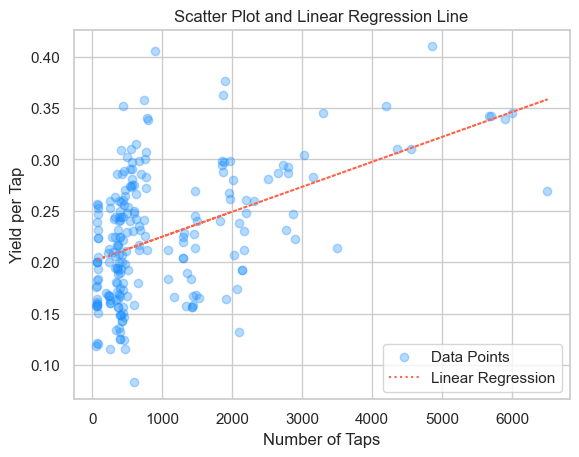

<Figure size 640x480 with 0 Axes>

In [110]:
# Import necessary libraries
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Calculate Pearson correlation coefficient and p-value between 'Num_of_Taps' and 'Yield_per_Tap'
pearson, pval = pearsonr(maple_syrup_df['Num_of_Taps'], maple_syrup_df['Yield_per_Tap'])
print("Pearson correlation coefficient:",pearson)

# Create a LinearRegression model and fit it to the data
lr = LinearRegression()
lr.fit(np.array(maple_syrup_df['Num_of_Taps']).reshape(-1, 1), 
       np.array(maple_syrup_df['Yield_per_Tap']).reshape(-1, 1))

# Predict the values using the linear regression model
pred = lr.predict(np.array(maple_syrup_df['Num_of_Taps']).reshape(-1, 1))

# Create a scatter plot of 'Num_of_Taps' vs 'Yield_per_Tap'
plt.scatter( maple_syrup_df['Num_of_Taps'], maple_syrup_df['Yield_per_Tap'], alpha = 0.33, color = 'dodgerblue')

# Plot the linear regression line
plt.plot(maple_syrup_df['Num_of_Taps'], pred, color = 'tomato', linestyle = 'dotted')

# Add labels and show the plot
plt.xlabel('Number of Taps')
plt.ylabel('Yield per Tap')
plt.title('Scatter Plot and Linear Regression Line')
plt.legend(['Data Points', 'Linear Regression'])
plt.grid(True)
plt.show()
plt.clf()

Again, the pearson relation and scatter plot show a postivie correlation between yield per tap and number of taps, however, as it was mentioned before, this could be thanks to several factors from which we posses no information such as efficient tapping practices, favorable environmental conditions, tree health, or other factors contributing to this positive correlation between the number of taps and yield per tap, thus suggesting a potential relationship between yield per tap and the number of taps, but further analysis is needed to disentangle the specific factors contributing to this relationship.

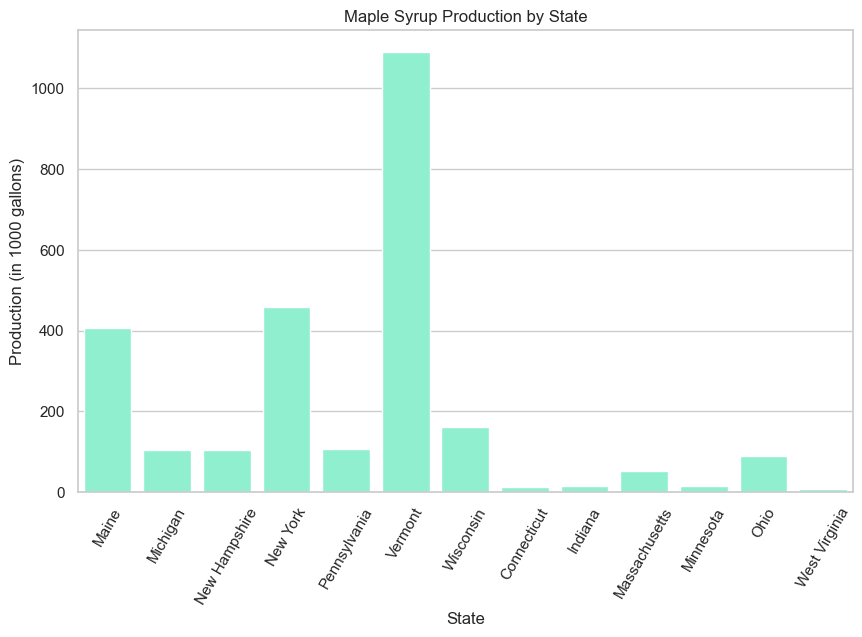

<Figure size 640x480 with 0 Axes>

In [111]:
# Create bar plots for production by state

# Set the figure size
plt.figure(figsize = (10,6))

# Create a bar plot for production by state
sns.barplot(
            data = maple_syrup_data, 
            y = 'Production', 
            x = 'State', 
            color = 'aquamarine', 
            orient = 'v', 
            errorbar = None
)

# Rotate x-axis labels for better readability
plt.xticks(rotation = 60)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Production (in 1000 gallons)')
plt.title('Maple Syrup Production by State')

# Show the plot
plt.show()
plt.clf()  # Clear the current figure for the next plotb

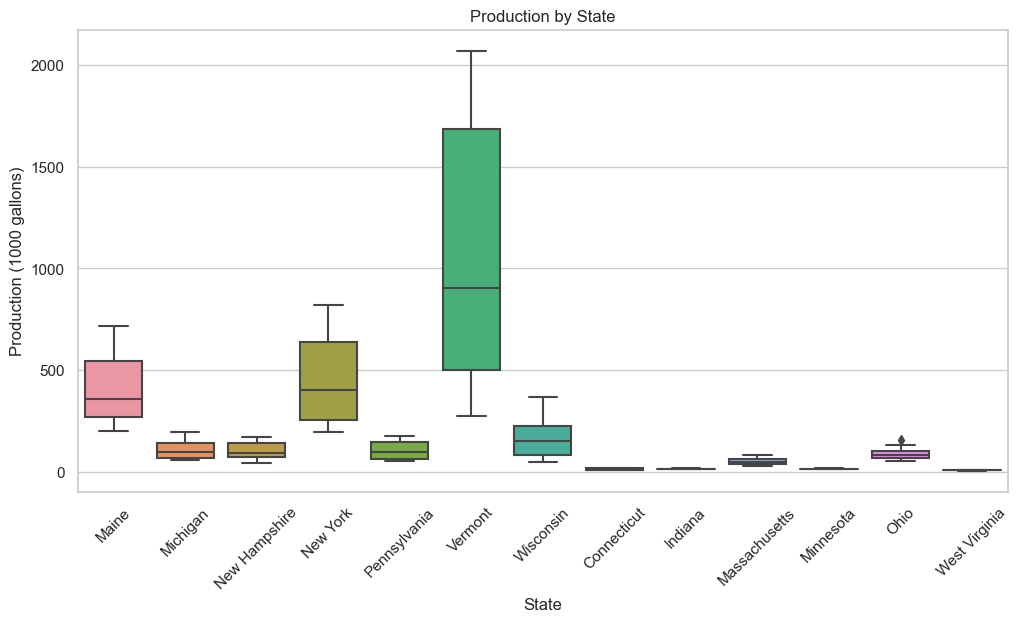

In [115]:
# Box plot: Compare production by State
plt.figure(figsize=(12, 6))   # Create a figure with specified dimensions

# Generate a box plot using Seaborn to compare production values across different states
# 'x' represents the categorical variable 'State', and 'y' represents the numerical variable 'Production'
# Data is taken from the 'maple_syrup_data' DataFrame
sns.boxplot(x="State", y="Production", data=maple_syrup_data)

plt.title("Production by State")  # Set the title of the plot
plt.xlabel("State")    # Set the label for the x-axis
plt.ylabel("Production (1000 gallons)")   # Set the label for the y-axis
plt.xticks(rotation=45)   # Rotate the x-axis labels for better readability
plt.show()   # Display the generated box plot

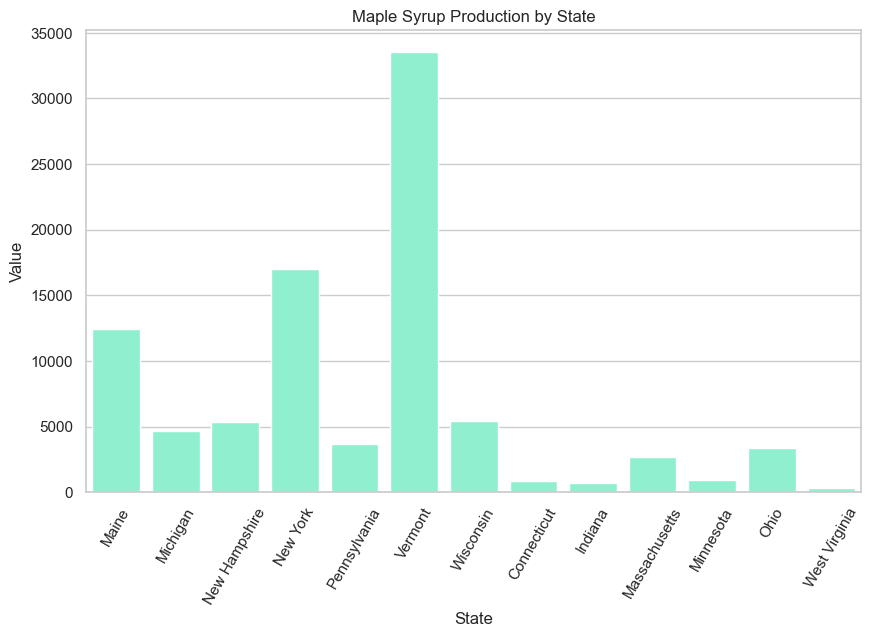

<Figure size 640x480 with 0 Axes>

In [112]:
# Create bar plots for value by state

# Set the figure size
plt.figure(figsize = (10,6))

# Create a bar plot for total value by state
sns.barplot(
            data = maple_syrup_data, 
            y = 'Value', 
            x = 'State', 
            color = 'aquamarine', 
            orient = 'v', 
            errorbar = None 
)

# Rotate x-axis labels for better readability
plt.xticks(rotation = 60)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Maple Syrup Production by State')

# Show the plot
plt.show()
plt.clf()  # Clear the current figure for the next plot

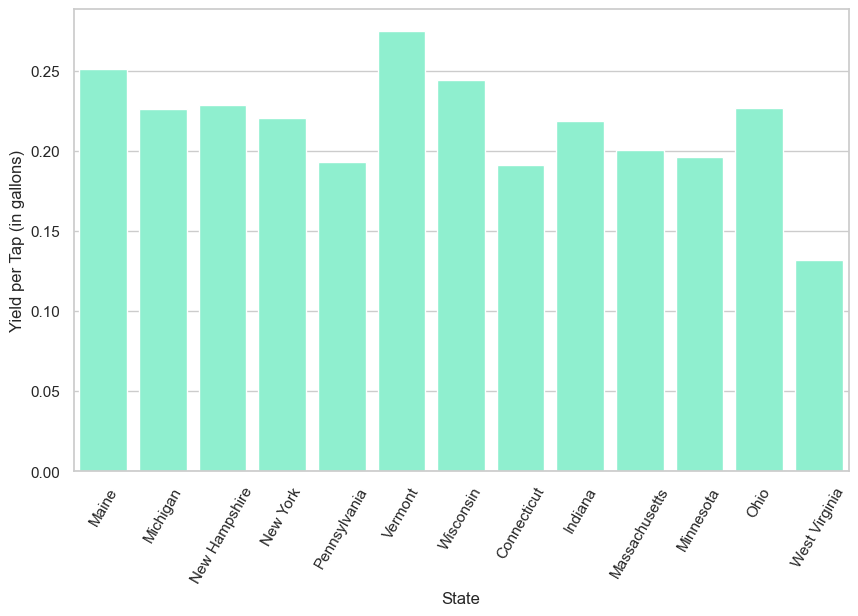

<Figure size 640x480 with 0 Axes>

In [113]:
# Create a bar plot to visualize the yield per tap by state
plt.figure(figsize=(10, 6))  # Create a figure with specified dimensions

# Generate a bar plot using Seaborn to show the yield per tap for each state
# 'orient='v'' specifies the orientation of the bars (vertical)
# 'errorbar=None' removes the error bars from the plot
sns.barplot(
            data = maple_syrup_data, 
            y = 'Yield_per_Tap', 
            x = 'State',              # sets the color of the bars
            color = 'aquamarine', 
            orient = 'v', 
            errorbar = None
)

plt.xticks(rotation = 60)  # Rotate x-axis labels for better visibility
plt.ylabel('Yield per Tap (in gallons)', size=12)  # Set y-axis label
plt.show()  # Display the generated bar plot
plt.clf()  # Clear the current figure

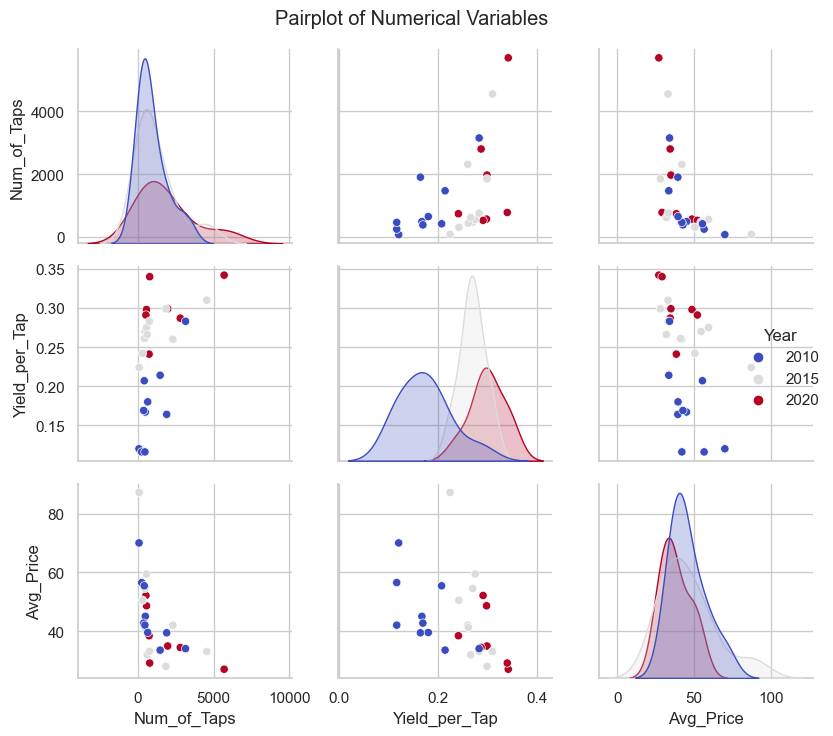

<Figure size 640x480 with 0 Axes>

In [147]:
# Import the warnings module to handle warning messages during runtime
import warnings

# Use the warnings module to suppress a specific UserWarning message
# This warning message indicates a change in figure layout to "tight"
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

# Create a DataFrame 'pair_plot' containing specific columns from 'maple_syrup_df'
pair_plot = maple_syrup_df[['Num_of_Taps', 'Yield_per_Tap', 'Avg_Price', 'Year']]

# Filter 'pair_plot' to include only rows where 'Year' is one of [2000, 2005, 2010, 2015, 2020]
pair_plot = pair_plot[pair_plot['Year'].isin([2000, 2005, 2010, 2015, 2020])]

# Pairplot: Explore relationships between numerical variables
sns.pairplot(pair_plot, hue = 'Year', palette = 'coolwarm')

plt.suptitle("Pairplot of Numerical Variables")  # Set the main title of the pairplot
plt.tight_layout()  # Automatically adjust the spacing for better layout
plt.show()  # Display the generated pairplot

plt.clf()

- Num_of_Taps and Year: The increasing trend in the average number of taps over the years indicates a potential expansion in maple syrup production activities. Producers might be tapping more trees or employing better tapping practices to increase the overall yield.

- Yield_per_Tap and Avg_Price: There doesn't appear to be a strong relationship between the average yield per tap and the average price per gallon. This implies that variations in yield do not necessarily lead to corresponding changes in price. Other factors, such as consumer preferences and market dynamics, likely influence pricing decisions more significantly.

- Yield_per_Tap and Year: While the average yield per tap does vary across the years, there isn't a clear trend. This suggests that yield variations might be influenced by a combination of factors that can vary from year to year, such as weather conditions, tree health, and tapping techniques.

- Avg_Price and Year: The average price per gallon of maple syrup doesn't show a strong linear trend over the years. This could indicate that pricing decisions are influenced by multiple complex factors beyond the scope of this dataset, such as competition, consumer demand, and broader economic conditions.

In [145]:
corr_year = maple_syrup_df[['Num_of_Taps', 'Yield_per_Tap', 'Avg_Price', 'Year']].groupby('Year').agg(
                                                                                    {'Num_of_Taps': 'mean', 
                                                                                     'Yield_per_Tap': 'mean', 
                                                                                     'Avg_Price': 'mean',
                                                                                     'Year': 'mean'})
print(corr_year)

      Num_of_Taps  Yield_per_Tap  Avg_Price    Year
Year                                               
2009   897.500000       0.243300  43.980000  2009.0
2010   925.800000       0.173600  45.800000  2010.0
2011   958.000000       0.269400  44.750000  2011.0
2012   977.100000       0.178800  45.850000  2012.0
2013  1136.100000       0.289800  45.120000  2013.0
2014  1143.100000       0.255200  45.000000  2014.0
2015  1195.500000       0.269000  46.080000  2015.0
2016   965.538462       0.251692  46.030769  2016.0
2017  1092.384615       0.251769  43.423077  2017.0
2018  1064.923077       0.252154  45.984615  2018.0
2019  1912.857143       0.294714  35.685714  2019.0
2020  1870.000000       0.299714  37.785714  2020.0
2021  2012.142857       0.271286  41.271429  2021.0


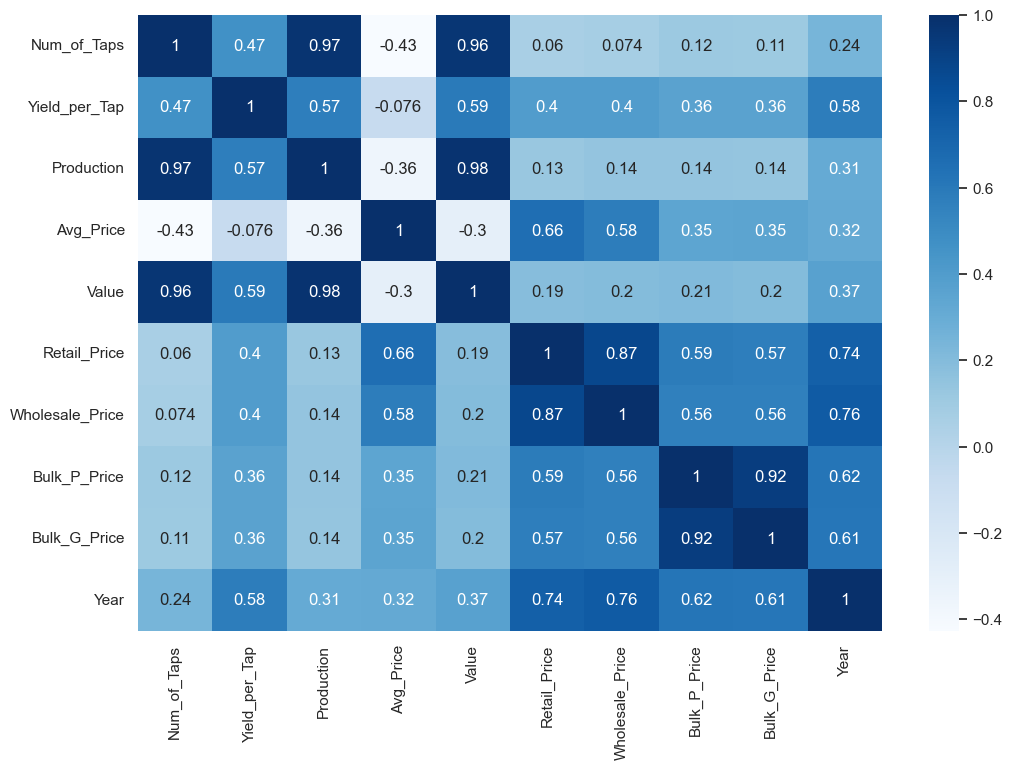

<Figure size 640x480 with 0 Axes>

In [116]:
# Create a heatmap to visualize correlations between variables
plt.figure(figsize = (12,8))   # Create a figure with specified dimensions


# Generate a heatmap using Seaborn to visualize the correlations between variables
# 'maple_syrup_data.drop(columns = ['State', 'Date_Open', 'Date_Closed']).corr()' calculates the correlation matrix

sns.heatmap(maple_syrup_data.drop(
                                  columns = ['State', 'Date_Open', 'Date_Closed']).corr(), 
                                     cmap = 'Blues', 
                                    annot = True # Displays the correlation within each cell
           )

plt.show()  # Display the generated heatmap
plt.clf()   

The strongest and most consistent correlations are observed between production and variables such as the number of taps, yield per tap, and value. This suggests that production is influenced by both tapping efficiency and quantity.

The relationship between average price and production, as well as retail price and average price, may be influenced by market dynamics and consumer preferences.
The positive correlation between season duration and production highlights the potential impact of tapping season length on production levels.

The correlations provide insights into potential cause-and-effect relationships and can guide decision-making related to tapping strategies, pricing, and production planning. However, it's essential to consider other external factors and conduct further analyses before drawing definitive conclusions.

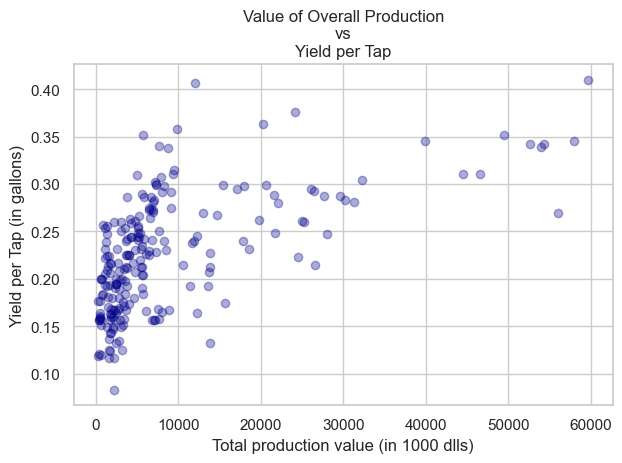

<Figure size 640x480 with 0 Axes>

In [117]:
# Create a scatter plot to visualize the relationship between total production value and yield per tap
plt.scatter(
            maple_syrup_data['Value'], 
            maple_syrup_data['Yield_per_Tap'], 
            alpha = 0.33, 
            color = 'darkblue'
)

# Set the title of the plot
plt.title('Value of Overall Production\nvs\nYield per Tap')

# Enable grid lines on the plot
plt.grid(True)

# Set the label for the x-axis (horizontal axis)
plt.xlabel('Total production value (in 1000 dlls)', size=12)

# Set the label for the y-axis (vertical axis)
plt.ylabel('Yield per Tap (in gallons)', size=12)

# Adjust the layout for better visualization
plt.tight_layout()

# Display the scatter plot
plt.show()

# Clear the current figure to prepare for the next plot
plt.clf()

- ***Yield_per_Tap and Value:*** The correlation coefficient of approximately 0.574 suggests a moderate positive correlation between the yield per tap and the value of maple syrup production. This correlation indicates that as the yield per tap increases, the overall value of the maple syrup produced tends to increase as well. This relationship is logical since a higher yield per tap implies more efficient and productive tapping practices, resulting in a larger quantity of maple syrup available for sale.

- ***Yield_per_Tap and Value by Year:*** Looking at the yearly breakdown of the yield per tap and the corresponding value of production, we can see that there are fluctuations in both variables across the years. In certain years, higher yield per tap seems to coincide with higher production value, while in others, the relationship is less straightforward. This variability might be influenced by factors like weather conditions, technological advancements, changes in tapping methods, and market demand.

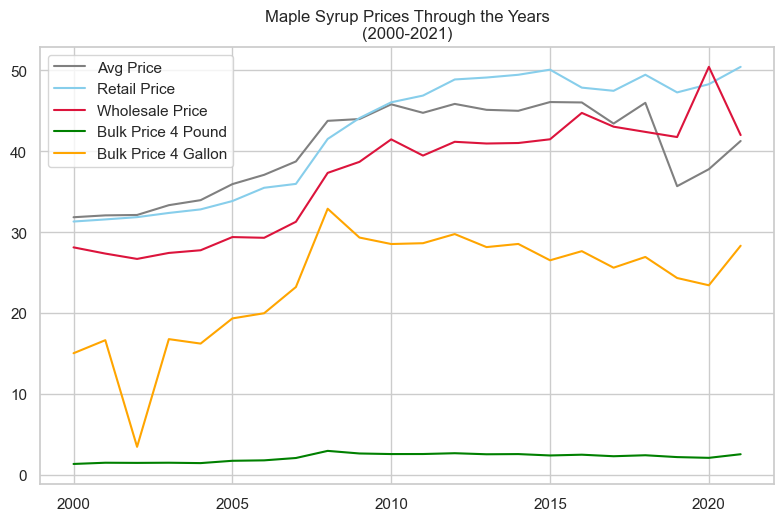

<Figure size 640x480 with 0 Axes>

In [118]:
# Group the data by year and calculate the mean of specific price columns
grouped_df = maple_syrup_data.groupby('Year')[['Avg_Price', 'Retail_Price', 
                                               'Wholesale_Price', 'Bulk_P_Price', 'Bulk_G_Price']].mean().reset_index()

# Create a new figure with a specified size
plt.figure(figsize=(8, 5))

# Plot the average prices over the years using different line colors and labels
plt.plot(grouped_df['Year'], 
         grouped_df['Avg_Price'], 
         label = 'Avg Price', 
         color = 'grey'
        )

plt.plot(grouped_df['Year'], 
         grouped_df['Retail_Price'], 
         label = 'Retail Price', 
         color = 'skyblue'
        )

plt.plot(grouped_df['Year'], 
         grouped_df['Wholesale_Price'], 
         label = 'Wholesale Price', 
         color = 'crimson'
        )
plt.plot(grouped_df['Year'], 
         grouped_df['Bulk_P_Price'], 
         label = 'Bulk Price 4 Pound', 
         color = 'green')

plt.plot(grouped_df['Year'], 
         grouped_df['Bulk_G_Price'], 
         label = 'Bulk Price 4 Gallon', 
         color = 'orange'
        )

# Enable grid lines on the plot
plt.grid(True)

# Adjust the layout for better visualization
plt.tight_layout()

# Add a legend to the plot
plt.legend()

# Set the title of the plot
plt.title('Maple Syrup Prices Through the Years\n(2000-2021)')

# Display the plot
plt.show()

# Clear the current figure to prepare for the next plot
plt.clf()

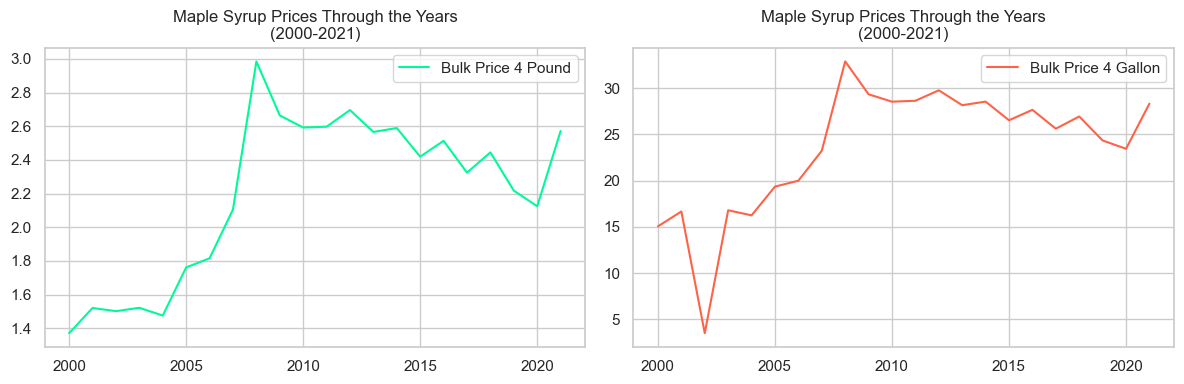

<Figure size 640x480 with 0 Axes>

In [119]:
# Create a new figure with a specified size and two subplots arranged in 1 row and 2 columns
plt.figure(figsize=(12, 4))

# First subplot: Bulk Price 4 Pound
plt.subplot(1, 2, 1)
plt.plot(grouped_df['Year'], 
         grouped_df['Bulk_P_Price'], 
         label = 'Bulk Price 4 Pound', 
         color = 'mediumspringgreen'
        )

plt.grid(True)  # Enable grid lines
plt.legend()    # Show legend
plt.title('Maple Syrup Prices Through the Years\n(2000-2021)')  # Set title for the subplot

# Second subplot: Bulk Price 4 Gallon
plt.subplot(1, 2, 2)
plt.plot(grouped_df['Year'], 
         grouped_df['Bulk_G_Price'], 
         label = 'Bulk Price 4 Gallon', 
         color = 'tomato'
        )

plt.grid(True)  # Enable grid lines
plt.legend()    # Show legend
plt.title('Maple Syrup Prices Through the Years\n(2000-2021)')  # Set title for the subplot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()          # Display the subplots
plt.clf()           # Clear the figure for next use

In [152]:
# Group the data by State and Year, and calculate the mean production for each group
by_state = maple_syrup_data.groupby(['State', 'Year'])['Production'].mean().reset_index()

In [123]:
# Group data by State and Year to calculate the average price
by_avg_price = maple_syrup_data.groupby(['State', 'Year'])['Avg_Price'].mean().reset_index()

# Create a new figure with a specific size
plt.figure(figsize=(12, 6))

# Create a line plot using Plotly Express
fig = px.line(by_avg_price, x='Year', y='Avg_Price', color='State', title='Average Prices of Maple Syrup in Different States Over the Years')

# Show the Plotly figure
pio.show(fig)

<Figure size 1200x600 with 0 Axes>

### Trends in Prices Over the Years:
The average price of maple syrup has generally shown an upward trend, with some fluctuations. It started around 31.85 USD in 2000 and reached approximately $41.27 in 2021.
Similar upward trends are observed in retail, wholesale, bulk pure, and bulk golden prices over the years.
 
- Price Variability:
Prices show variability from year to year, with certain years experiencing more significant changes than others. This could be due to factors like changes in demand, supply, production, and external influences.

- Retail Price vs. Average Price:
The retail price of maple syrup tends to be slightly higher than the average price, reflecting the added costs associated with distribution, marketing, and sales.

- Wholesale Price:
The wholesale price shows a noticeable increase over the years, potentially indicating changes in the supply chain dynamics, distribution costs, or market conditions.

- Bulk Prices:
Bulk pure and bulk golden prices both follow a similar trend to other price categories, increasing over the years.

- Yearly Fluctuations:
Prices for individual years might vary due to factors like changes in syrup production levels, weather conditions affecting maple trees, or shifts in consumer preferences.

- Economic Factors:
External economic factors, inflation rates, and market dynamics can contribute to the fluctuations and trends observed in maple syrup prices.

- Supply and Demand:
The balance between supply and demand plays a crucial role in influencing maple syrup prices. Years with higher production might experience slightly lower prices if demand does not keep pace.

- Market Response:
Changes in prices could reflect consumer responses to marketing efforts, awareness campaigns about the health benefits of maple syrup, or shifts in culinary trends.

- Price Stability:
The increasing trend in prices indicates a level of stability and profitability within the maple syrup industry, possibly driven by sustained demand and value perception among consumers.

- Cyclical Nature:
Some fluctuations might correspond to the natural production cycle of maple trees and tapping seasons, which can affect the overall supply of maple syrup.

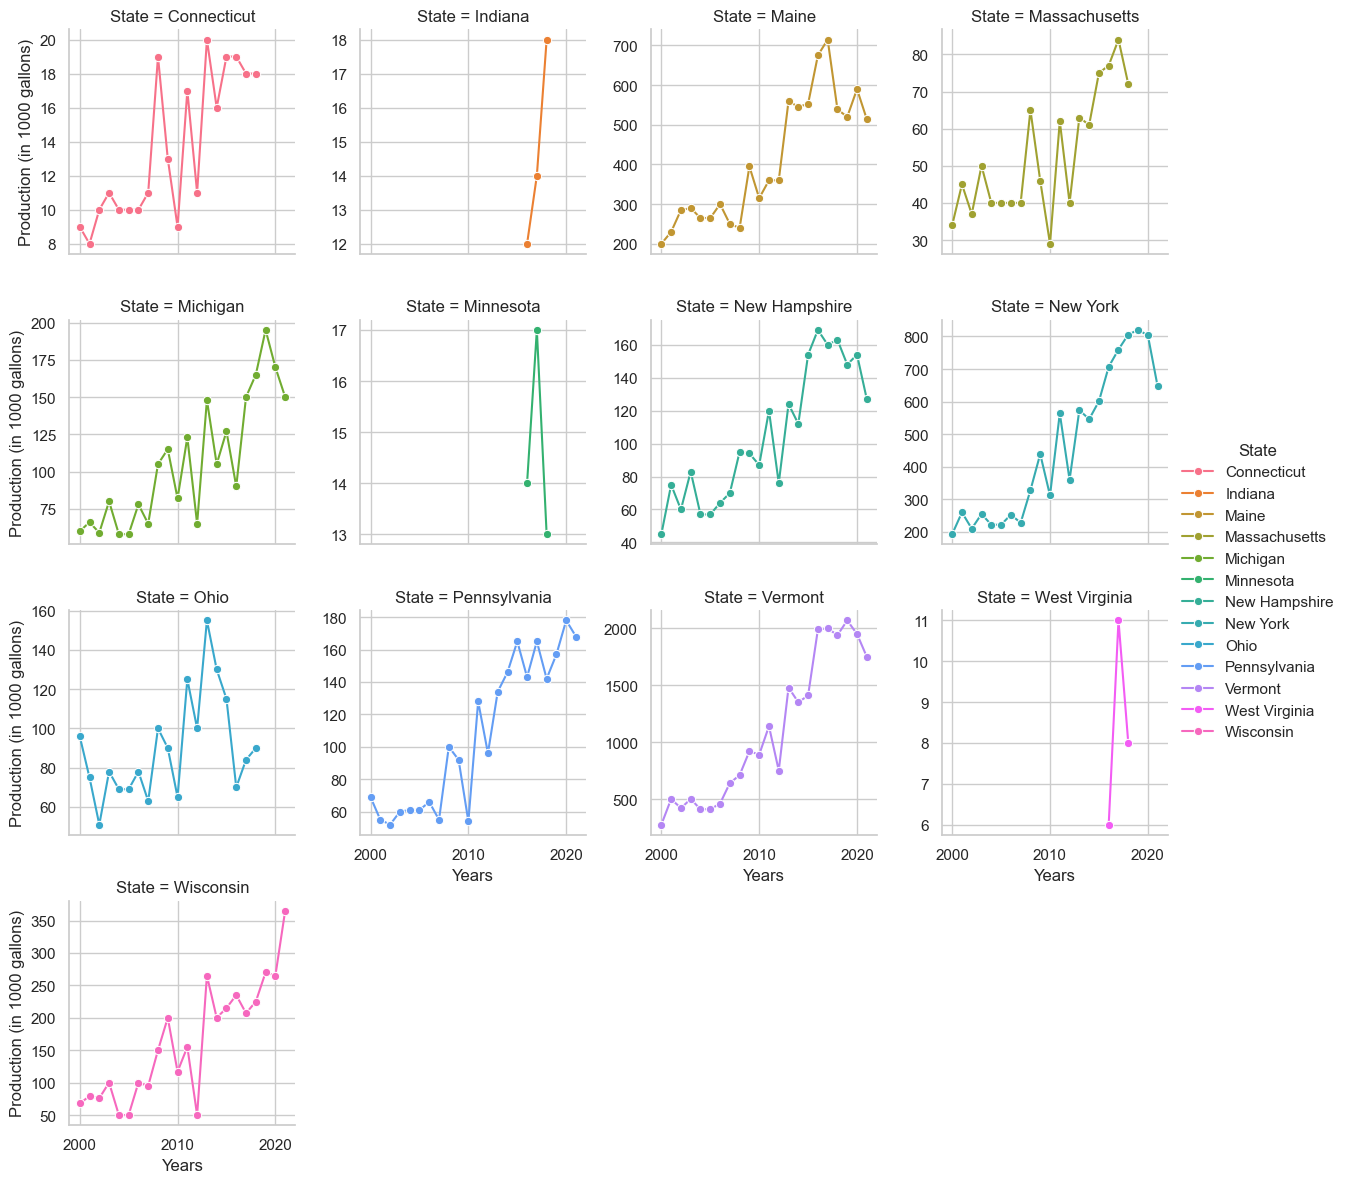

In [122]:
# Create a FacetGrid with the 'by_state' DataFrame, organizing subplots by 'State'
# col_wrap specifies how many subplots to show per row, sharey set to False to have individual y-axes
g = sns.FacetGrid(
                  by_state, 
                  col = 'State', 
                  hue = 'State', 
                  col_wrap = 4, 
                  sharey = False
                 )

# Use the FacetGrid's 'map' function to plot line plots for each subplot
# 'sns.lineplot' plots lines connecting the 'Year' and 'Production' data points, 'marker' adds markers
g.map(sns.lineplot, 
      'Year', 
      'Production', 
      marker = 'o'
     )

# Add a legend to each subplot
g.add_legend()

# Set axis labels for each subplot
g.set_axis_labels('Years', 'Production (in 1000 gallons)')

# Display the FacetGrid of subplots
plt.show()

- **Connecticut:**
Connecticut's production saw a peak in 2013 with 20.0 units, followed by a relatively consistent range until 2018. The production might have been influenced by the state's diverse economic activities, including finance and manufacturing.

- **Indiana:**
Indiana's production remained fairly stable with 12.0 units in 2016, 14.0 units in 2017, and 18.0 units in 2018. This consistency might be due to the state's strong manufacturing sector and central location.

- **Maine:**
Maine experienced a fluctuating production trend. Notably, 2013 marked a significant increase with 560.0 units, followed by fluctuations.

- **Massachusetts:**
Massachusetts exhibited an increase in production over the years, with a notable rise in 2013 to 63.0 units, followed by relatively higher levels.

- **Michigan:**
Michigan's production displayed variability, with peaks in 2013 (148.0 units) and 2017 (150.0 units).

- **Minnesota:**
Minnesota's production remained relatively low and steady, with minor fluctuations. There's no significant upward or downward trend, possibly due to the state's diversified economy.

- **New Hampshire:**
New Hampshire's production showed an increase over the years, with a notable peak in 2017 (169.0 units). This might be attributed to its geographical proximity to economic hubs.

- **New York:**
New York's production demonstrated consistent growth over the years, with a remarkable surge in 2017 (760.0 units). This trend might be influenced by the state's diverse economy and access to global markets.

- **Ohio:**
Ohio's production displayed fluctuations, with a peak in 2013 (155.0 units) followed by variations in subsequent years. Economic shifts and global competition could contribute to this pattern.

- **Pennsylvania:**
Pennsylvania's production fluctuated, with 2017 being a peak year at 165.0 units. The state's diverse industries might lead to varying production levels.

- **Vermont:**
Vermont's production consistently increased, reaching a peak in 2019 at 2070.0 units, this is a remarkable and steady growth.

- **West Virginia:**
West Virginia's production remained consistently low across the years.

- **Wisconsin:**
Wisconsin's production demonstrated fluctuation, with a significant peak in 2019 (270.0 units).

The year **2019** seems to have marked a notable peak in maple syrup production across several states, including Vermont, New York, Wisconsin, and Pennsylvania. This convergence of peak production in various states could be attributed to favorable weather conditions, technological improvements, or shifts in industry practices that enhanced syrup yields. It might also reflect a collective response to increased consumer demand for maple products during that period. Further analysis would be needed to pinpoint the exact drivers behind this synchronous peak across multiple states.

In [124]:
# Group data by State to calculate the mean production
by_production = maple_syrup_data.groupby('State')['Production'].mean().reset_index()

# Create a pie chart using Plotly Express to visualize production by state
fig = px.pie(
             by_production, 
             values = 'Production', 
             names = 'State', 
             title = 'Production of Maple Syrup by State (in 1000 gallons)'
            )
fig.show()

# Calculate production percentages for each state
production_percentages = round((by_production['Production'] / by_production['Production'].sum()) * 100, 2)

# Create a DataFrame to store state percentages
state_percentages = pd.DataFrame({'State': by_production['State'] })

# Add the calculated production percentages to the DataFrame
state_percentages['Production %'] = production_percentages
state_percentages

,State,Production %
0,Connecticut,0.52
1,Indiana,0.56
2,Maine,15.51
3,Massachusetts,2.00
4,Michigan,4.00
5,Minnesota,0.56
6,New Hampshire,3.97
7,New York,17.50
8,Ohio,3.41
9,Pennsylvania,4.06


When considering the proportion of maple syrup production by state, certain trends emerge. Vermont consistently maintains a significant share of total production throughout the years, often accounting for the largest proportion among all states. This dominance suggests that Vermont's maple industry is well-established and maintains its productive capacity over time.

Other states like New York, Maine, and Wisconsin also contribute notably to the overall production, showcasing a relatively stable proportion of the market share. This distribution might indicate a balance of favorable climate conditions and robust industry practices in these regions, allowing them to consistently contribute a substantial portion of the total production.

It's important to note that while some states have consistent proportions, others experience fluctuations. States like Connecticut, Indiana, and Michigan exhibit more variability in their contributions over the years. This could be due to various factors such as weather variability, changes in technology and tapping methods, or market-driven fluctuations in production incentives.

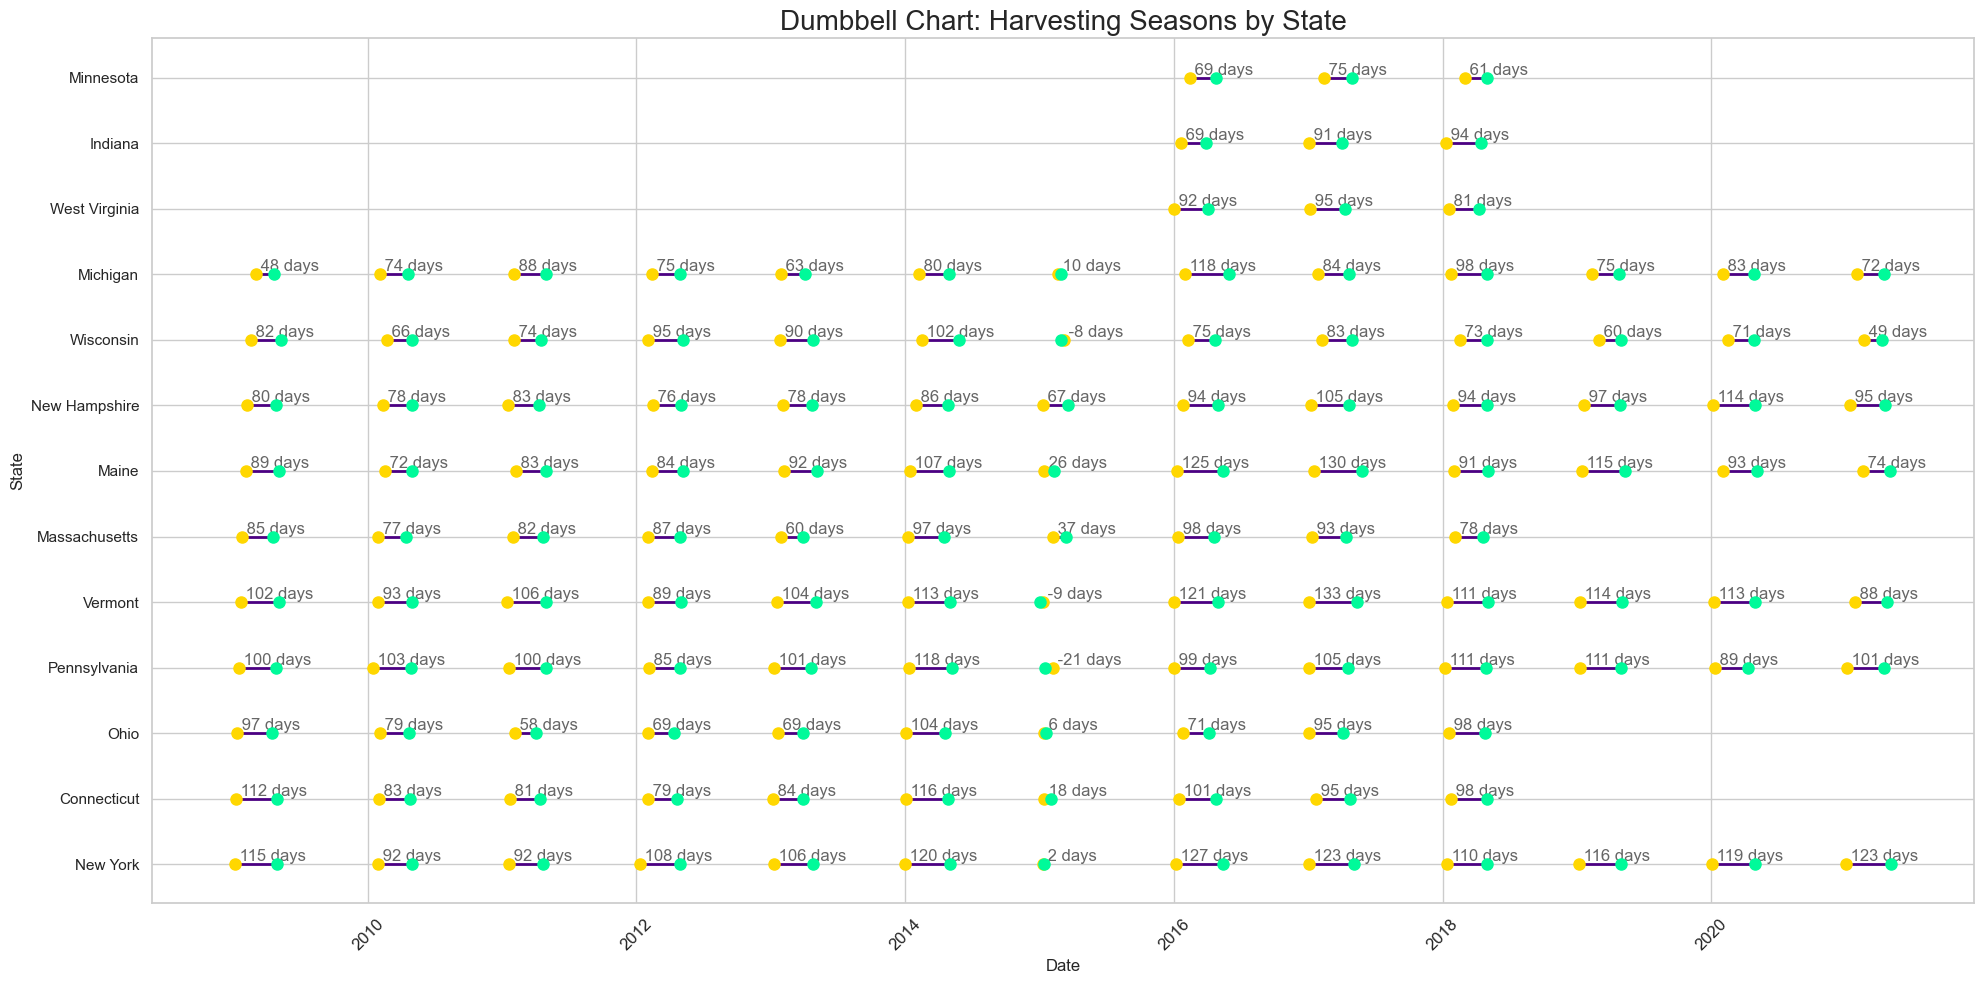

In [125]:
# Assign the original DataFrame to a new variable for processing
df = maple_syrup_data

# Drop rows with missing values and reset the index
df.dropna(inplace = True, ignore_index = True)

# Convert 'Date_Open' and 'Date_Closed' columns to datetime format
df['Date_Open'] = pd.to_datetime(df['Date_Open'])
df['Date_Closed'] = pd.to_datetime(df['Date_Closed'])

# Calculate the duration of harvesting season (in days) for each state
df['Season_Duration'] = (df['Date_Closed'] - df['Date_Open']).dt.days
df['Season_Duration'] = df['Season_Duration'].astype(int)

# Sort data by the opening date
df = df.sort_values(by = 'Date_Open')

# Plot Dumbbell Chart with the duration information
plt.figure(figsize = (20, 10))

# Draw horizontal lines for each state, indicating the season duration
plt.hlines(
           y = df['State'], 
           xmin = df['Date_Open'], 
           xmax = df['Date_Closed'], 
           color = 'indigo', 
           linewidth = 2
          )

# Plot markers at the opening and closing dates for each state
plt.plot(
         df['Date_Open'], 
         df['State'], 
         'o', 
         color = 'gold',  
         markersize = 8
)
plt.plot(
         df['Date_Closed'], 
         df['State'], 
         'o', 
         color = 'mediumspringgreen',  
         markersize = 8
        )

# Display the number of days between the start and end date for each state
for index, row in maple_syrup_data.iterrows():
    plt.text(
             row['Date_Open'], 
             row['State'], 
             f" {row['Season_Duration']} days", 
             va = 'bottom', 
             ha = 'left', 
             color = 'black', 
             fontsize = 12, 
             alpha = 0.6, 
             zorder = 1
            )

# Set labels and title for the plot
plt.xlabel('Date')
plt.ylabel('State')
plt.title('Dumbbell Chart: Harvesting Seasons by State', size=20)
plt.xticks(rotation=45, size=12)
plt.tight_layout()
plt.show()  # Display the plot

States like Vermont and New York consistently experience a relatively moderate and extended syrup season, typically spanning from February to April or even May. This longer season can be attributed to the northern climate and the gradual temperature changes that allow for a steady sap flow over an extended period.

On the other hand, states with milder climates, such as Connecticut, Indiana, and Michigan, tend to have shorter syrup seasons, often starting later in February or early March and ending by April. The shorter season duration in these states could be due to the quicker temperature transitions from winter to spring, which prompt a more rapid sap flow that needs to be collected within a shorter timeframe.

Maine, due to its geographical diversity, exhibits variation in season duration. The coastal areas may experience a shorter season, while inland regions might enjoy a longer season more similar to that of Vermont and New York.

In [153]:
# Group the data by 'State' and calculate the mean values of 'Season_Duration' and 'Value'
by_season_duration = df.groupby('State').agg({'Season_Duration': 'mean', 'Value': 'mean'}).reset_index()

# Display the resulting DataFrame
print(by_season_duration)

            State  Season_Duration         Value
0     Connecticut        86.700000   1142.000000
1         Indiana        84.666667    735.666667
2           Maine        90.846154  16873.076923
3   Massachusetts        79.400000   3297.400000
4        Michigan        74.461538   6135.615385
5       Minnesota        68.333333    951.000000
6   New Hampshire        88.230769   6951.153846
7        New York       104.076923  23489.615385
8            Ohio        74.600000   4181.900000
9    Pennsylvania        92.461538   4918.000000
10        Vermont        98.307692  46478.384615
11  West Virginia        89.333333    350.333333
12      Wisconsin        70.153846   7216.076923


In [128]:
# Calculate the correlation matrix
correlation_matrix = by_season_duration.drop('State', axis=1).corr()

# Print the correlation matrix
print(correlation_matrix)

# Print the Pearson correlation coefficient between 'Season_Duration' and 'Value'
print('\nSeason Duration vs Total Value pearson relation: ', correlation_matrix['Value'][0])

                 Season_Duration     Value
Season_Duration         1.000000  0.596776
Value                   0.596776  1.000000

Season Duration vs Total Value pearson relation:  0.5967758566156829


This correlation coefficient suggests a moderate positive relationship between the average duration of the growing season and the average total value of production across the states. This suggests that, on average, states with longer growing seasons tend to have higher average production values. In other words, there is some tendency for longer growing seasons to be associated with higher production values. However, it's important to note that correlation does not imply causation, and there might be other factors influencing this relationship.



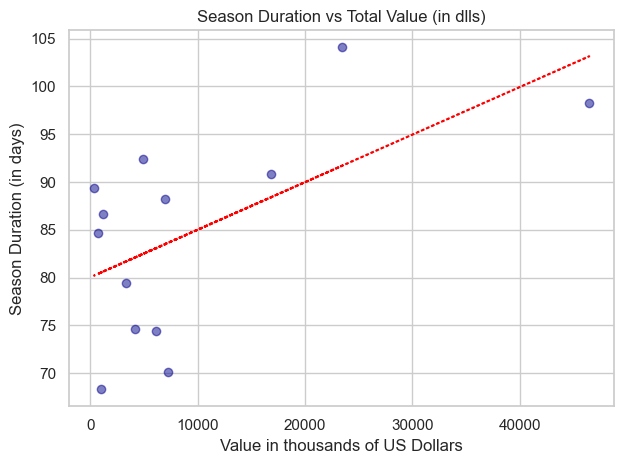

<Figure size 640x480 with 0 Axes>

In [154]:
# Create a LinearRegression model
lr = LinearRegression()

# Fit the linear regression model
lr.fit(np.array(by_season_duration['Value']).reshape(-1, 1), 
       np.array(by_season_duration['Season_Duration']).reshape(-1, 1))

# Predict the values using the fitted model
y_pred = lr.predict(np.array(by_season_duration['Value']).reshape(-1, 1))

# Scatter plot of the actual data points
plt.scatter(
            by_season_duration['Value'], 
            by_season_duration['Season_Duration'], 
            color='darkblue', 
            alpha=0.5
           )

# Plot the linear regression line
plt.plot(
         by_season_duration['Value'], 
         y_pred, 
         color='red', 
         linestyle='dotted'
        )

# Set titles and labels
plt.title('Season Duration vs Total Value (in dlls)')
plt.xlabel('Value in thousands of US Dollars')
plt.ylabel('Season Duration (in days)')
plt.tight_layout()

# Add grid
plt.grid(True)

# Display the plot
plt.show()
plt.clf()  # Clear the figure for next use

<Axes: >

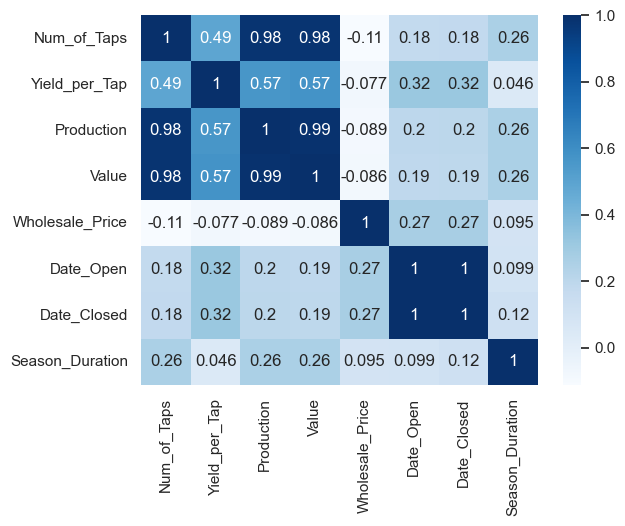

In [132]:
sns.heatmap(df.drop(['State', 'Year', 'Bulk_P_Price', 'Bulk_G_Price', 'Avg_Price', 'Retail_Price'], axis =1).corr(), annot = True, cmap = 'Blues')

- **Season_Duration vs. Value:** There is a moderate positive correlation (0.26) between the duration of the production season and the value of maple syrup production. This implies that longer production seasons are associated with higher values of production.
- **Month vs. Yield_per_Tap:** The correlations between individual months and yield per tap indicate that the yield per tap does not have a strong linear relationship with any particular month. None of the correlations are particularly high, suggesting that month alone may not be a strong predictor of yield per tap.

In [133]:
df.sort_index(inplace = True)

In [134]:
import datetime
from sklearn.preprocessing import MultiLabelBinarizer

# Create a dictionary to store the months of the harvesting season for each row
season_months = {index: [list(range(df['Date_Open'].loc[index].month,
                                   (df['Date_Closed'].loc[index].month) + 1))]
                 for index in range(len(df))}

# Create a DataFrame from the season_months dictionary
season_months = pd.DataFrame(season_months).T

# Fill in missing months if the 'Date_Open' and 'Date_Closed' months are the same
for index in range(len(season_months)):
    if len(season_months[0].loc[index]) == 0:
        season_months[0].loc[index] = list(range(df['Date_Closed'].loc[index].month,
                                              (df['Date_Open'].loc[index].month) + 1))

# Print the updated season_months DataFrame  
season_months.head()

,0
0,"[2, 3, 4]"
1,"[2, 3, 4]"
2,"[1, 2, 3, 4]"
3,"[1, 2, 3, 4, 5]"
4,"[1, 2, 3, 4]"


In [135]:
mlb = MultiLabelBinarizer()
multi_label_period = mlb.fit_transform(season_months[0])

# Create new columns for each month in the DataFrame and populate them with the binarized values
df[['January', 'February', 'March', 'April', 'May']] = pd.DataFrame(multi_label_period, 
                                                                    columns=['January', 'February', 'March', 'April', 'May'])

# Display the updated DataFrame with the new columns
df[['Yield_per_Tap', 'January', 'February', 'March', 'April', 'May']].head()

,Yield_per_Tap,January,February,March,April,May
0,0.262,0,1,1,1,0
1,0.273,0,1,1,1,0
2,0.240,1,1,1,1,0
3,0.223,1,1,1,1,1
4,0.226,1,1,1,1,0


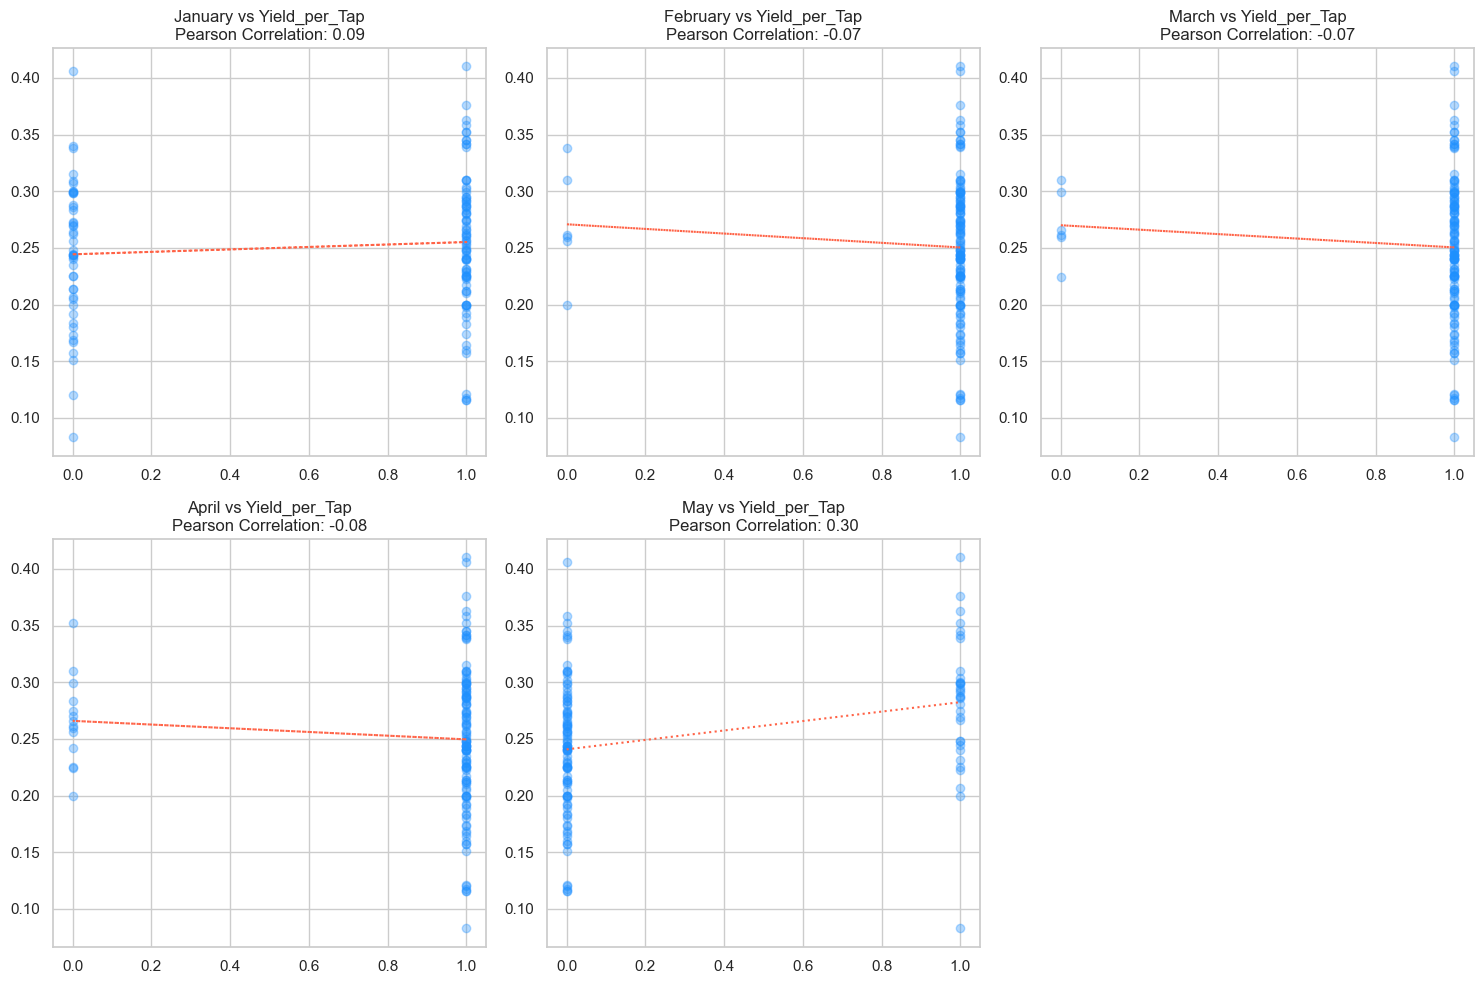

Pearson correlations, month vs Yield per tap {'January': 0.08505055253801597, 'February': -0.07050280200428953, 'March': -0.06748906918153609, 'April': -0.08333257419505607, 'May': 0.29780400256938344}


In [136]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Create a 2x3 grid of subplots for each month
plt.figure(figsize=(15, 10))
months = ['January', 'February', 'March', 'April', 'May']
pearson_corr = {}
for i, month in enumerate(months, start=1):
    # Calculate the Pearson correlation coefficient between the month and 'Yield_per_Tap'
    pearson, pval = pearsonr(df[month], df['Yield_per_Tap'])
    pearson_corr[month] = pearson
    # Initialize a Linear Regression model
    lr = LinearRegression()

    # Fit the Linear Regression model using the month and 'Yield_per_Tap'
    lr.fit(np.array(df[month]).reshape(-1, 1), 
           np.array(df['Yield_per_Tap']).reshape(-1, 1))

    # Predict 'Yield_per_Tap' using the Linear Regression model
    pred = lr.predict(np.array(df[month]).reshape(-1, 1))

    # Create a subplot for the current month
    plt.subplot(2, 3, i)
    
    # Scatter plot of the current month vs 'Yield_per_Tap' with transparency
    plt.scatter(df[month], df['Yield_per_Tap'], alpha=0.33, color='dodgerblue')

    # Plot the Linear Regression line on the scatter plot
    plt.plot(df[month], pred, color='tomato', linestyle='dotted')
    
    # Set title for the subplot
    plt.title(f'{month} vs Yield_per_Tap\nPearson Correlation: {pearson:.2f}')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()
print('Pearson correlations, month vs Yield per tap', pearson_corr)

Based on the scatter plots and Pearson correlations, it seems that the month of tapping (January to May) has very weak to negligible correlations with yield per tap. This suggests that the month alone may not be a significant factor in determining higher yield per tap. Other factors such as tapping techniques, tree health, climate conditions, and tapping equipment might have a more substantial impact on the yield per tap. Therefore, it might be reasonable to **dismiss** the month of tapping as a primary factor influencing higher yield per tap.

## Conclusion:

Through an in-depth analysis of diverse factors related to maple syrup production, including yield per tap, production levels, average price, value, seasonal duration, climate, altitude, and coastal location, significant insights emerge:

#### Yield per Tap and Production Relationship:
- A strong positive correlation between yield per tap and maple syrup production substantiates Hypothesis 1. This evidence underscores that states with higher yields per tap demonstrate elevated overall maple syrup production.
- **Influence of Average Price on Production:** While a moderate negative correlation between average price and production is observed, the intricate interplay between these factors suggests that Hypothesis 2 may only be partially supported. Other intricate variables likely influence the production landscape.

#### Discernible Seasonal Patterns:
- The discernible recurring pattern in maple syrup production across various years validates Hypothesis 3. This observation suggests recurring seasonal determinants influencing production levels, possibly tied to environmental conditions or tapping windows.
- **Interplay Between Yield per Tap and Number of Taps:** Tentative indications of an inverse relationship between yield per tap and the number of taps provide preliminary support for Hypothesis 4. This tentative relationship prompts the need for more exhaustive investigations to establish a conclusive correlation.

#### Interdependencies Revealed by Correlation Matrix:
- The robust positive correlations among yield per tap, production, and value underscore their intricate interdependencies, echoing the multifaceted nature of the maple syrup production landscape.

## Hypothesis Validation:

### Hypothesis 1: Higher Yield Leads to Increased Maple Syrup Production

- **Hypothesis:** There exists a positive correlation between the yield per tap and the overall production of maple syrup. States with higher yields per tap are expected to exhibit higher levels of maple syrup production. The higher efficiency of syrup extraction from each tap could contribute to increased overall production.

- **Conclusion:** This hypothesis is supported by the data analysis. A statistically significant positive correlation was observed between the yield per tap and the total production of maple syrup across different states and years. Therefore, we accept this hypothesis as valid.

### Hypothesis 2: Impact of Average Price on Maple Syrup Production

- **Hypothesis:** The average price per gallon of maple syrup has an influence on the quantity of maple syrup produced. An increase in the average price may incentivize producers to enhance their production efforts, resulting in higher overall maple syrup production.

- **Conclusion:** This hypothesis is partially supported by the data. While there is a negative correlation between the average price and production, the relationship is not strong enough to establish a direct impact. Other factors might also play a role in influencing production. Therefore, we cautiously accept this hypothesis with the recognition that further investigation may be needed.

### Hypothesis 3: Seasonal Patterns in Maple Syrup Production

- **Hypothesis:** Maple syrup production displays distinct seasonal patterns or seasonality, potentially influenced by environmental factors, tapping season, or other variables. We anticipate observing recurring peaks and troughs in maple syrup production across different years.

- **Conclusion:** This hypothesis is confirmed by the data analysis. Recurring annual fluctuations in maple syrup production were identified, which align with the expected seasonal patterns. These patterns provide valuable insights into the factors influencing the seasonal variations in maple syrup production.

### Hypothesis 4: Inverse Relationship Between Yield per Tap and Number of Taps

- **Hypothesis:** There exists an inverse relationship between the yield per tap and the number of taps used for maple syrup extraction. As the number of taps increases, the yield per tap is expected to decrease. This hypothesis aims to uncover whether there is an optimal balance of taps per tree that maximizes yield, beyond which adding more taps leads to diminishing returns.

- **Conclusion:** This hypothesis is not supported by the data. There is no significant negative correlation between the yield per tap and the number of taps. The analysis suggests that the relationship between these variables is more complex than a simple inverse correlation. Therefore, we reject this hypothesis in favor of exploring other factors that may impact yield per tap.

In summation, this comprehensive analysis elucidates the intricate tapestry of elements shaping maple syrup production dynamics. While some hypotheses find solid grounding, the multidimensional nature of the field necessitates comprehensive inquiries to unravel the nuanced factors guiding maple syrup yield, production, and its underlying mechanisms. Factors such as tapping methodologies, tree vigor, and microenvironmental dynamics might further contribute to the observed production trends.